# Springboard Graphs

Here we attempt to model graphs as systems of charged particles, connected by springs, in order to determine "optimal" plotting positions for nodes. We will do a time-step approximation of the movement of the nodes, based on spring and electrostatic forces. We will assume that the graph has no self-loops.

Let each spring (graph connection) have unstretched length $1$ and spring constant $k>0$. Let each node $A$ have mass and charge $\deg(A)$, and let the electric field constant be $Q<0$.

So, for every node $A$, the force due to a spring connecting node $A$ to $B$ is
$$k (1-\|\vec{AB}\|)\frac{\vec{AB}}{\|\vec{AB}\|}$$
and the electrostatic force between node $A$ and any other node $B$ is
$$Q\frac{\deg(A)\deg(B)}{\|\vec{AB}\|^2}\frac{\vec{AB}}{\|\vec{AB}\|}.$$

We will also add a universal attractive force to all of the nodes from the origin,
$$\frac{-\vec{A}\deg(A)*0.001}{|A||}$$

Since each node $A$ has mass $\deg(A)$, we can relate the net force on a node to a time-step approximation of accelaration in order to approximate the movement of the nodes:
$$\frac{\Delta \vec{d}}{\Delta t^2}\deg(A)\approx m\vec{a}= \vec{F}\implies \Delta \vec{d} \approx \frac{\Delta t^2}{\deg(A)}\vec{F}.$$

Given any node $A$, let $\mathcal{X}$ denote the set of all nodes not equal to $A$, and let $\mathcal{Y}\subseteq\mathcal{X}$ denote the set of nodes connected to $A$. Then, for the time step $\Delta t$, the displacement of node $A$ is
$$\frac{-\vec{A}\deg(A)*0.001}{|A||} + \sum_{B\in\mathcal{Y}}\frac{\Delta t^2k (\|\vec{AB}\|-1)}{\deg(A)}\frac{\vec{AB}}{\|\vec{AB}\|}+\sum_{B\in\mathcal{X}}\frac{Q\Delta t^2\deg(B)}{\|\vec{AB}\|^2}\frac{\vec{AB}}{\|\vec{AB}\|}.$$



In [6]:
from graph-plot import * # See: https://github.com/francisp336/diGraph

SyntaxError: invalid syntax (<ipython-input-6-936544eda53d>, line 1)

In [2]:
help(diGraph)

Help on module diGraph.diGraph in diGraph:

NAME
    diGraph.diGraph

CLASSES
    builtins.object
        DiGraph
        Graph
        Node
        SpringBoard
    
    class DiGraph(builtins.object)
     |  DiGraph object
     |  
     |  Methods defined here:
     |  
     |  __init__(self, nodesDict:dict)
     |      Construct DiGraph object
     |      nodesDict - adjacency dictionary of first positive integers
     |  
     |  force(self, n:int)
     |      Move forward time step simulation
     |      n - number of time steps
     |  
     |  plot(self, saveAs:str='_')
     |      Plot the Graph
     |      saveAs - (optional) a file path to save the plot
     |  
     |  random_reset(self)
     |      Randomly reset node positions and let time step simulation resettle
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
 

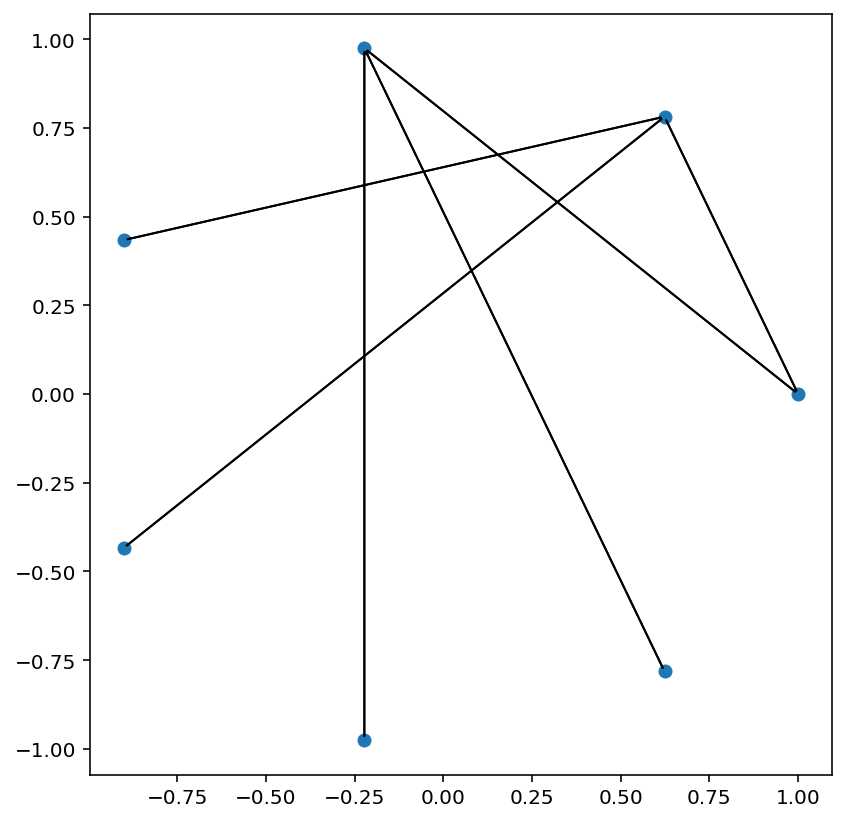

In [3]:
nodesForBinTree= {1:[2,3], 2:[4,5], 3:[6,7], 4:[], 5:[], 6:[], 7:[]}
binTree = SpringBoard(nodesForBinTree, k=1, Q=-1)

binTree.plot()

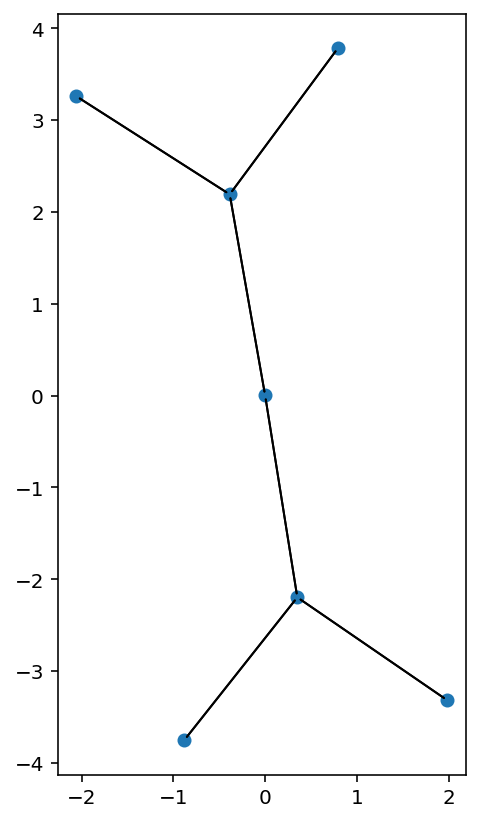

In [4]:
binTree.move(0.1,8000)
binTree.plot()

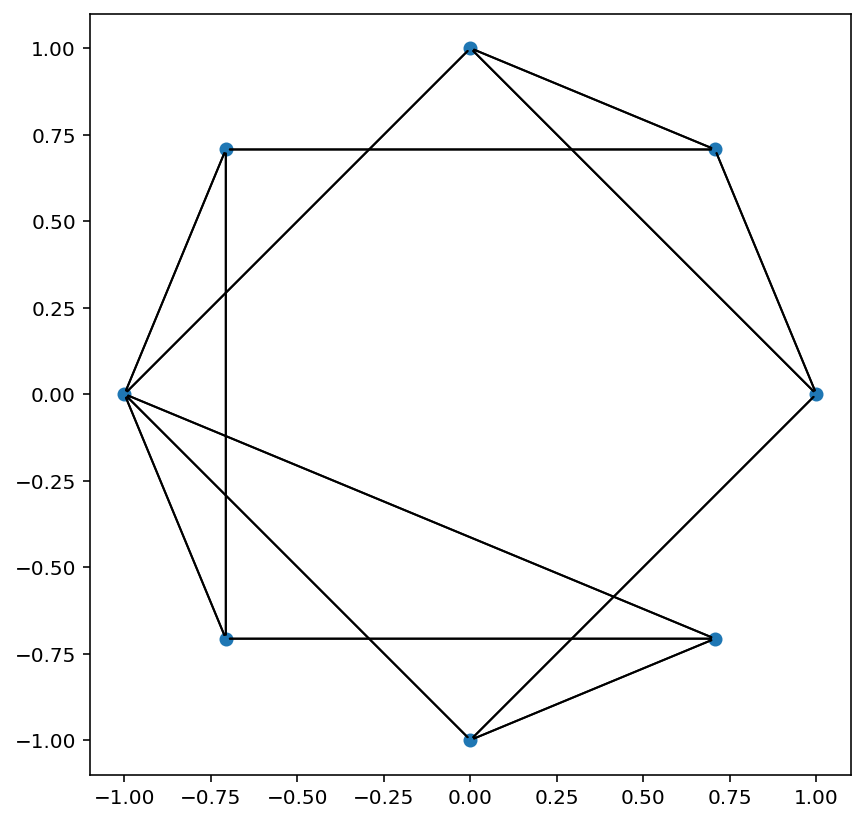

In [5]:
nodesForPageRank = {1:[2,3,7], 2:[3,4], 3:[5], 4:[5,6], 5:[6,7,8], 6:[8], 7:[8], 8:[] }
pageRank = SpringBoard(nodesForPageRank, k=1.5, Q=-1)

pageRank.plot()

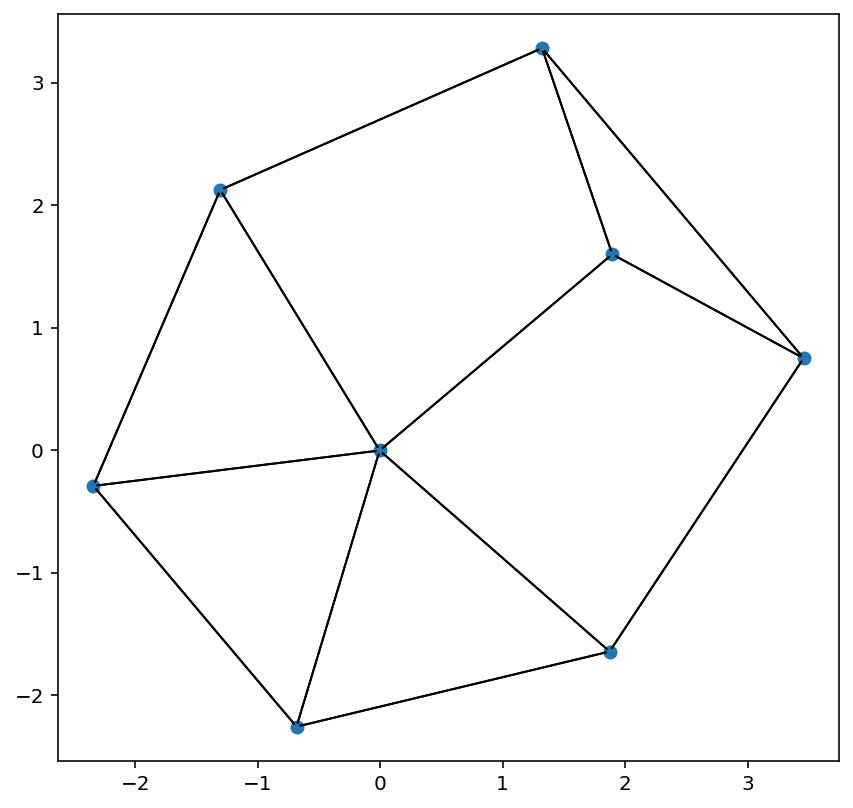

In [6]:
pageRank.move(0.1,8000)

pageRank.plot()

# The `DiGraph` Class

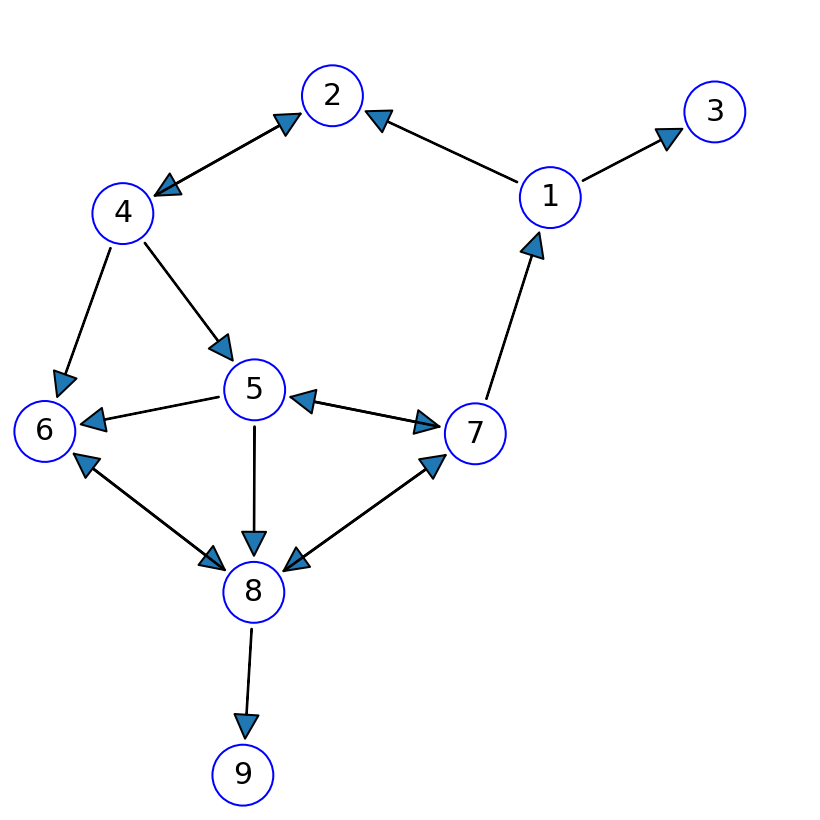

In [7]:
digraph = DiGraph({1: [3,2], 2: [4], 3: [], 4: [2, 5, 6], 5: [7, 8, 6], 6: [8], 7: [1, 5, 8], 8: [6, 7, 9], 9:[]})
digraph.plot()

In [8]:
digraph.adjacencyMatrix

array([[0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0]])

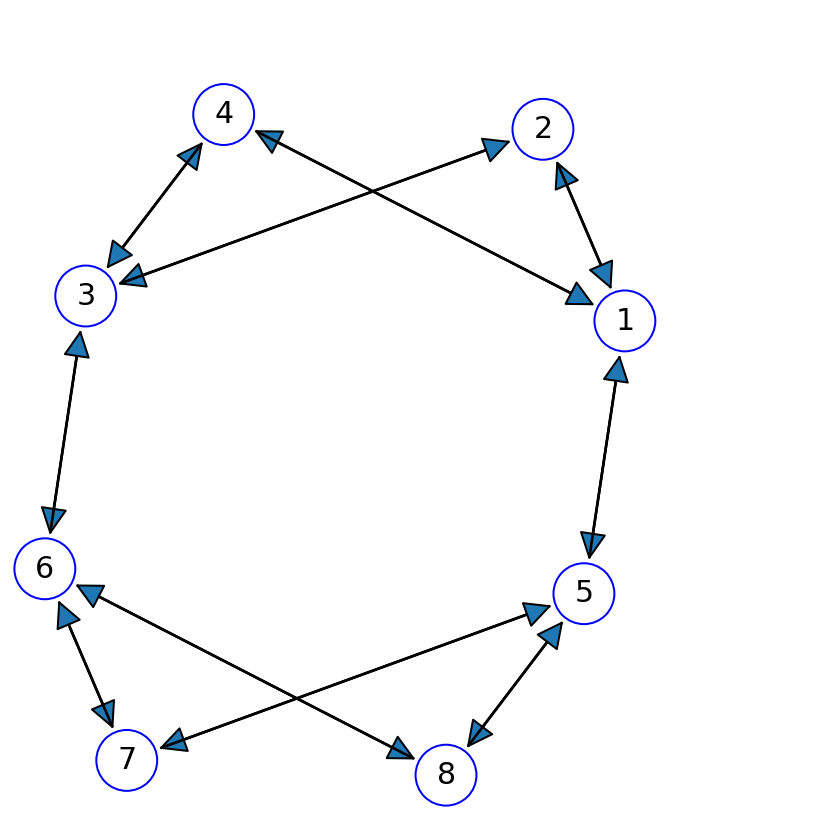

In [9]:
fromDanielSpielman = DiGraph({1:[2,5,4], 2:[1,3], 3:[2,6,4], 4:[1,3], 5:[1,7,8], 6:[7,8,3], 7:[5,6], 8:[5,6]})
fromDanielSpielman.plot()

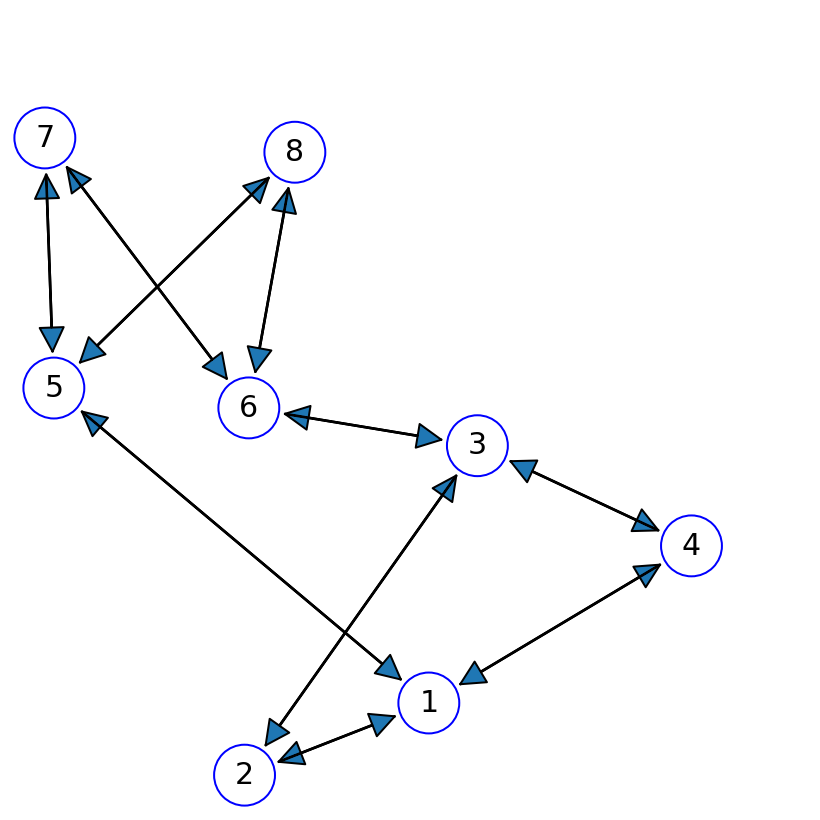

In [10]:
fromDanielSpielman.random_reset()
fromDanielSpielman.plot()

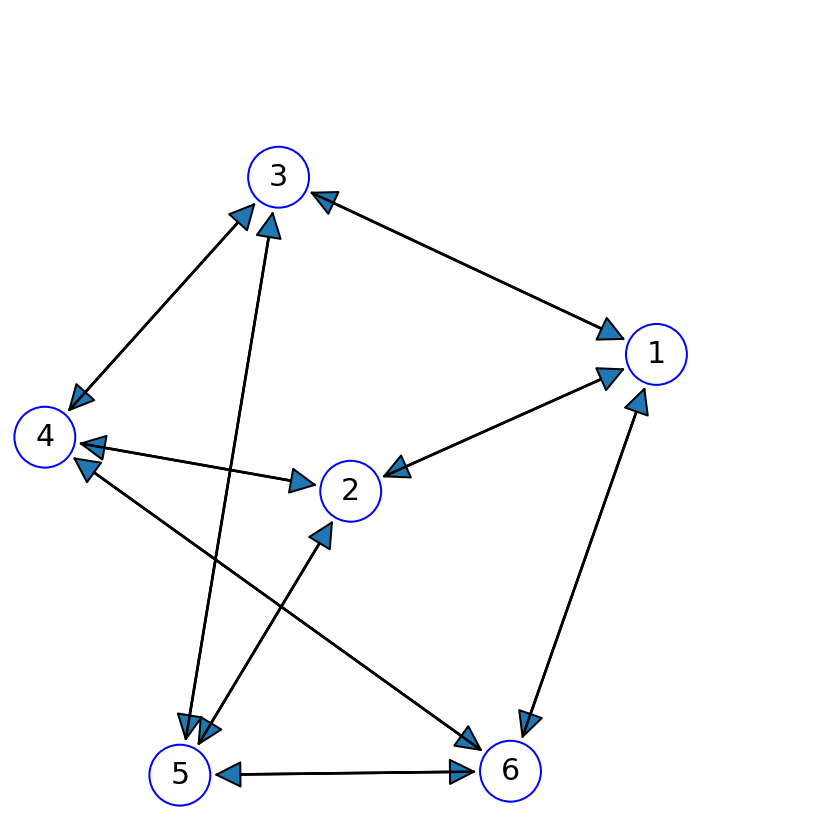

In [11]:
nonPlanar = DiGraph({1:[2,3,6], 2:[1,5,4], 3:[1,4,5], 4:[2,3,6], 5:[2,3,6], 6:[1,4,5]})
nonPlanar.plot()

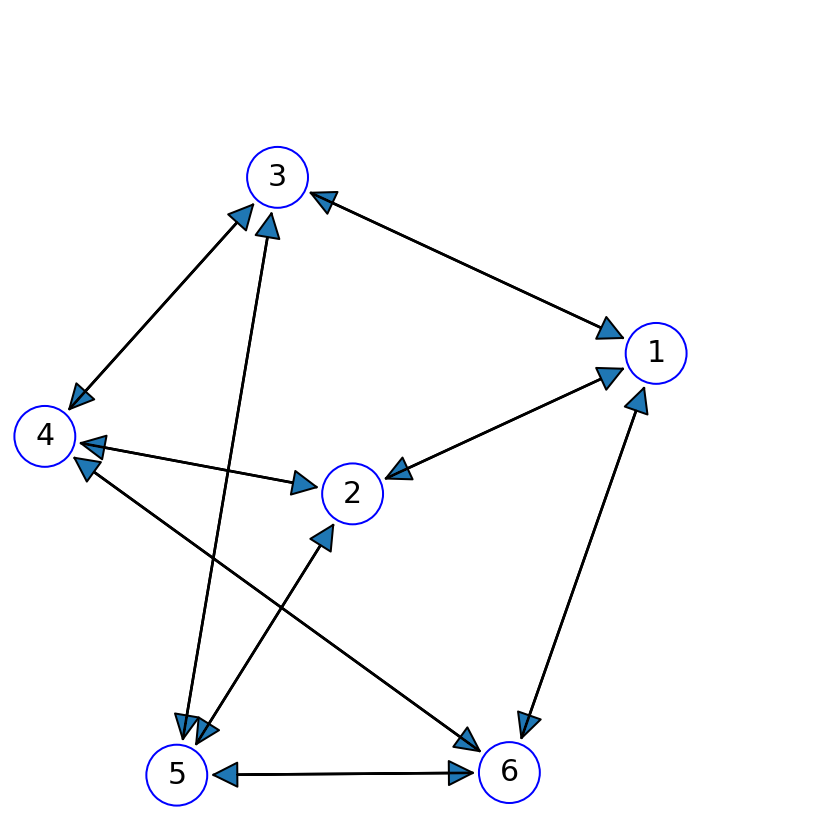

In [12]:
nonPlanar.force(30000)
nonPlanar.plot()